In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

with open('10070B4.csv') as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints:')
index = data.index('Values')


In [3]:
B4 = pd.DataFrame(data[start_index+1:index], columns =['Length'])
B4['B4_Values'] = data[index+1:-1]
B4.head()

,Length,B4_Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [4]:
B4['Length'] = pd.to_numeric(B4['Length'])
B4['B4_Values'] = pd.to_numeric(B4['B4_Values'])

print(B4.dtypes)

Length       float64
B4_Values    float64
dtype: object


In [5]:
B4 = B4.loc[~(B4==0).any(axis=1)]

In [6]:
print(B4.shape)
B4.head()

(615, 2)


,Length,B4_Values
35,0.275228,1591.1
36,0.550564,1574.2
37,0.826012,1573.6
38,1.101900,1569.8
39,1.378120,1567.1


In [7]:
# Opening the B5 file

with open('10070B5.csv') as file:
    for line in file:
        data = line.split(';')
start_index = data.index('Lengthpoints:')
index = data.index('Values')

In [8]:
B5 = pd.DataFrame(data[start_index+1:index], columns =['Length'])
B5['B5_Values'] = data[index+1:-1]

B5['Length'] = pd.to_numeric(B5['Length'])
B5['B5_Values'] = pd.to_numeric(B5['B5_Values'])

B5 = B5.loc[~(B5==0).any(axis=1)]

In [9]:
print(B5.shape)
B5.head()

(520, 2)


,Length,B5_Values
65,0.329500,1482.7
66,0.659044,1494.1
67,0.988785,1496.9
68,1.318903,1546.5
69,1.649197,1567.8


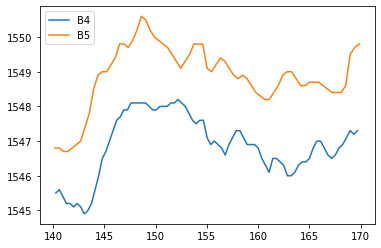

In [10]:
B4 = B4[B4.Length >= 140]
B5 = B5[B5.Length >= 140]

B4 = B4[B4.Length <= 170]
B5 = B5[B5.Length <= 170]

plt.plot(B4.Length,B4.B4_Values)
plt.plot(B5.Length,B5.B5_Values)
plt.legend(['B4','B5'])
plt.show()

In [11]:
B4

,Length,B4_Values
484,140.2708,1545.5
485,140.6192,1545.6
486,140.9675,1545.4
487,141.3157,1545.2
488,141.6641,1545.2
...,...,...
563,168.2451,1546.9
564,168.6055,1547.1
565,168.9662,1547.3
566,169.3265,1547.2


In [12]:
index = 0
B4_array = B4['Length'].to_numpy()
B5_array = B5['Length'].to_numpy()

for each in B5.Length:
    
    closest = np.abs(B4_array-each)
    smallest_difference_index = closest.argmin()
    closest_element = B4_array[smallest_difference_index]
    
    print(closest_element)
    
    B5_array[index] = closest_element
    index+=1
    
pd.set_option('display.max_rows', 200)

B5.Length = B5_array 
B5

140.2708
140.6192
140.9675
141.3157
142.0122
142.3605
142.709
143.0574
143.4066
144.1052
144.4549
144.805
145.155
145.505
146.2067
146.5577
146.9092
147.2608
147.612
148.3148
148.6664
149.0181
149.3701
149.7221
150.4267
150.7789
151.1315
151.4839
152.1889
152.542
152.8952
153.2486
153.602
154.3095
154.664
155.0185
155.373
155.728
156.4378
156.7926
157.1484
157.5043
158.2169
158.5738
158.9308
159.2881
159.646
160.3608
160.7171
161.0726
161.4277
161.7828
162.4948
162.8525
163.2108
163.569
164.2856
164.6449
165.0045
165.3642
165.7243
166.4442
166.8041
167.1648
167.5249
168.2451
168.6055
168.9662
169.3265
169.6867


,Length,B5_Values
448,140.2708,1546.8
449,140.6192,1546.8
450,140.9675,1546.7
451,141.3157,1546.7
452,142.0122,1546.8
453,142.3605,1546.9
454,142.7090,1547.0
455,143.0574,1547.4
456,143.4066,1547.8
457,144.1052,1548.5


In [13]:
merged_df = pd.merge(B4,B5, how= 'left')
merged_df

,Length,B4_Values,B5_Values
0,140.2708,1545.5,1546.8
1,140.6192,1545.6,1546.8
2,140.9675,1545.4,1546.7
3,141.3157,1545.2,1546.7
4,141.6641,1545.2,NaN
5,142.0122,1545.1,1546.8
6,142.3605,1545.2,1546.9
7,142.7090,1545.1,1547.0
8,143.0574,1544.9,1547.4
9,143.4066,1545.0,1547.8


In [14]:
merged_df['difference'] = merged_df['B5_Values']-merged_df['B4_Values']
merged_df

,Length,B4_Values,B5_Values,difference
0,140.2708,1545.5,1546.8,1.3
1,140.6192,1545.6,1546.8,1.2
2,140.9675,1545.4,1546.7,1.3
3,141.3157,1545.2,1546.7,1.5
4,141.6641,1545.2,NaN,NaN
5,142.0122,1545.1,1546.8,1.7
6,142.3605,1545.2,1546.9,1.7
7,142.7090,1545.1,1547.0,1.9
8,143.0574,1544.9,1547.4,2.5
9,143.4066,1545.0,1547.8,2.8


In [15]:
merged_df.fillna(method ='bfill', inplace = True)
merged_df.fillna(method ='pad', inplace = True)
merged_df

,Length,B4_Values,B5_Values,difference
0,140.2708,1545.5,1546.8,1.3
1,140.6192,1545.6,1546.8,1.2
2,140.9675,1545.4,1546.7,1.3
3,141.3157,1545.2,1546.7,1.5
4,141.6641,1545.2,1546.8,1.7
5,142.0122,1545.1,1546.8,1.7
6,142.3605,1545.2,1546.9,1.7
7,142.7090,1545.1,1547.0,1.9
8,143.0574,1544.9,1547.4,2.5
9,143.4066,1545.0,1547.8,2.8


In [16]:
for value in merged_df['difference']:
    if value <= -4:
        print('Houston, we have constriction')
    elif value >=4:
        print('We have expanded')

In [17]:
print(merged_df[merged_df['difference']<=-4].index.values)

[]
